# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
#Marcela code
#testing single value API
#url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"
#city_url = url+"&q="+ 'Boston' 
#print(city_url)

http://api.openweathermap.org/data/2.5/weather?appid=8c275ff7660be16800f61f05d41a47a2&units=imperial&q=Boston


In [5]:
# Set the API base URL
# Marcela code
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        #time.sleep(2) in case of too many searches, error, in seconds

    # Create endpoint URL with each city
    city_url = url+"&q="+city # Marcela code
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        response = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat'] # Marcela code
        city_lng = response['coord']['lon'] # Marcela code
        city_max_temp = response['main']['temp_max'] # Marcela code
        city_humidity = response['main']['humidity'] # Marcela code
        city_clouds = response['clouds']['all'] # Marcela code
        city_wind = response['wind']['speed'] # Marcela code
        city_country = response['sys']['country'] # Marcela code
        city_date = response['dt'] # Marcela code

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | airai
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | saint-augustin
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | salisbury
Processing Record 6 of Set 1 | alyangula
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | oussouye
Processing Record 10 of Set 1 | mocambique
City not found. Skipping...
Processing Record 11 of Set 1 | krasnoyarsk-66
City not found. Skipping...
Processing Record 12 of Set 1 | adrar
Processing Record 13 of Set 1 | labuan
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | buraydah
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | rio verde de mato grosso
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | alofi
Processing

Processing Record 35 of Set 4 | manta
Processing Record 36 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 37 of Set 4 | dalby
Processing Record 38 of Set 4 | georgetown
Processing Record 39 of Set 4 | biloela
Processing Record 40 of Set 4 | sola
Processing Record 41 of Set 4 | bira
Processing Record 42 of Set 4 | hualmay
Processing Record 43 of Set 4 | toyooka
Processing Record 44 of Set 4 | princeton
Processing Record 45 of Set 4 | usinsk
Processing Record 46 of Set 4 | constitucion
Processing Record 47 of Set 4 | emerald
Processing Record 48 of Set 4 | marsh harbour
Processing Record 49 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 0 of Set 5 | bethel
Processing Record 1 of Set 5 | mokobeng
Processing Record 2 of Set 5 | yumen
Processing Record 3 of Set 5 | kodiak
Processing Record 4 of Set 5 | teguise
Processing Record 5 of Set 5 | pahrump
Processing Record 6 of Set 5 | campo grande
Processing Record 7 of Set 5 | issoire
Processing Record 8 of S

Processing Record 18 of Set 8 | pasni
Processing Record 19 of Set 8 | dhupgari
Processing Record 20 of Set 8 | champerico
Processing Record 21 of Set 8 | juneau
Processing Record 22 of Set 8 | pathein
Processing Record 23 of Set 8 | poltavka
Processing Record 24 of Set 8 | mezen
Processing Record 25 of Set 8 | whyalla
Processing Record 26 of Set 8 | changchun
Processing Record 27 of Set 8 | vanderhoof
Processing Record 28 of Set 8 | jian
Processing Record 29 of Set 8 | yerbogachen
Processing Record 30 of Set 8 | sigli
Processing Record 31 of Set 8 | porbandar
Processing Record 32 of Set 8 | puerto suarez
Processing Record 33 of Set 8 | conceicao do araguaia
Processing Record 34 of Set 8 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 35 of Set 8 | gondar
Processing Record 36 of Set 8 | atherton
Processing Record 37 of Set 8 | madang
Processing Record 38 of Set 8 | shanhetun
Processing Record 39 of Set 8 | havoysund
Processing Record 40 of Set 8 | asau
Processing Reco

Processing Record 3 of Set 12 | sikeston
Processing Record 4 of Set 12 | itarema
Processing Record 5 of Set 12 | coquimbo
Processing Record 6 of Set 12 | keita
Processing Record 7 of Set 12 | torrington
Processing Record 8 of Set 12 | sheregesh
Processing Record 9 of Set 12 | llanes
Processing Record 10 of Set 12 | kodinsk
Processing Record 11 of Set 12 | obregon
Processing Record 12 of Set 12 | porto novo
Processing Record 13 of Set 12 | berlevag
Processing Record 14 of Set 12 | tomball
Processing Record 15 of Set 12 | eenhana
Processing Record 16 of Set 12 | hofn
Processing Record 17 of Set 12 | kadaya
Processing Record 18 of Set 12 | belmonte
Processing Record 19 of Set 12 | vilhena
Processing Record 20 of Set 12 | iaciara
Processing Record 21 of Set 12 | saposoa
Processing Record 22 of Set 12 | bam
Processing Record 23 of Set 12 | along
Processing Record 24 of Set 12 | kasempa
Processing Record 25 of Set 12 | bandiagara
Processing Record 26 of Set 12 | nelson bay
Processing Record 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # Marcela code

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,airai,-8.9266,125.4092,74.77,57,31,2.80,TL,1679281303
1,ushuaia,-54.8000,-68.3000,42.46,81,40,25.32,AR,1679281303
2,saint-augustin,51.2260,-58.6502,27.81,79,97,21.32,CA,1679281304
3,jamestown,42.0970,-79.2353,28.54,67,0,10.36,US,1679281304
4,salisbury,51.0693,-1.7957,48.02,89,75,6.91,GB,1679281305


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

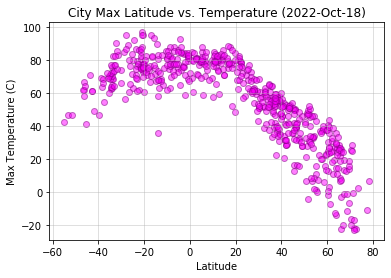

In [32]:
# Build scatter plot for latitude vs. temperature
# Marcela code
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color = 'magenta', alpha = .5, edgecolors="purple")
plt.grid(True, alpha = .5)

# Incorporate the other graph properties
# Marcela code
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-Oct-18)")

# Save the figure
plt.savefig("output_data/Fig1.png")
# Show plot
plt.show()

#### Latitude Vs. Humidity

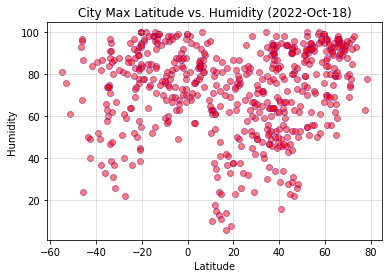

In [33]:
# Build the scatter plots for latitude vs. humidity
# Marcela code
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color = 'red', alpha = .5, edgecolors="purple")
plt.grid(True, alpha = .5)

# Incorporate the other graph properties
# Marcela code
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Max Latitude vs. Humidity (2022-Oct-18)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

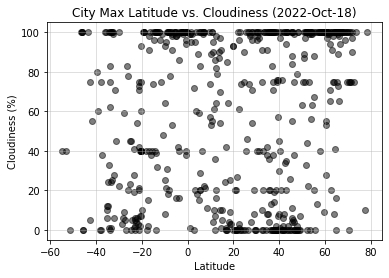

In [27]:
# Build the scatter plots for latitude vs. cloudiness
# Marcela code
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color = 'black', alpha = .5, edgecolors="black")
plt.grid(True, alpha = .5)

# Incorporate the other graph properties
# Marcela code
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Max Latitude vs. Cloudiness (2022-Oct-18)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

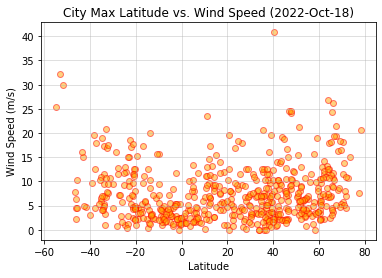

In [36]:
# Build the scatter plots for latitude vs. wind speed
# Marcela code
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color = 'orange', alpha = .5, edgecolors="red")
plt.grid(True, alpha = .5)

# Incorporate the other graph properties
# Marcela code
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs. Wind Speed (2022-Oct-18)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots
# Marcela code
def plot_linear_regression(x_values, y_values, title, x,y):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (x,y),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Marcela code
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,saint-augustin,51.2260,-58.6502,27.81,79,97,21.32,CA,1679281304
3,jamestown,42.0970,-79.2353,28.54,67,0,10.36,US,1679281304
4,salisbury,51.0693,-1.7957,48.02,89,75,6.91,GB,1679281305
8,oussouye,12.4850,-16.5469,73.58,88,82,6.62,SN,1679281306
9,adrar,20.5022,-10.0711,67.60,23,0,10.40,MR,1679281307


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# Marcela code
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,airai,-8.9266,125.4092,74.77,57,31,2.80,TL,1679281303
1,ushuaia,-54.8000,-68.3000,42.46,81,40,25.32,AR,1679281303
5,alyangula,-13.8483,136.4192,80.31,84,100,20.07,AU,1679281305
6,busselton,-33.6500,115.3333,82.62,39,24,3.31,AU,1679281306
7,punta arenas,-53.1500,-70.9167,46.51,76,40,32.21,CL,1679281154


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7856654094766923


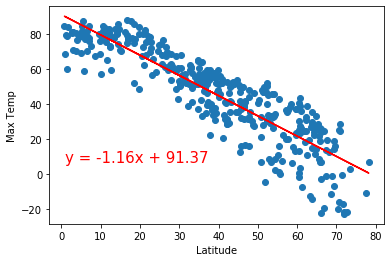

In [42]:
# Linear regression on Northern Hemisphere
# Marcela code
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"], ("Max Temp"), (1), (7))

The r-value is: 0.19806467438140446


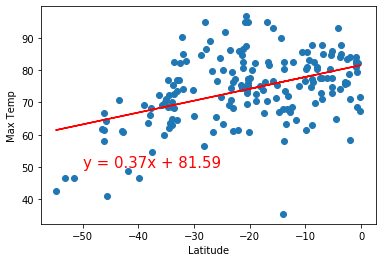

In [43]:
# Linear regression on Southern Hemisphere
# Marcela code
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], ("Max Temp"), (-50), (50))

**Discussion about the linear relationship:** 
The linear regression for Northern hemisphere latitude coordinates and max temperature shows a negative relationship and the variables are strongly related. The closer the latitude coordinates are to zero, the higher the max temperature and the further they are from zero, the lower the max temperature.
The linear regression for Sourthern hemisphere latitude coordinates and max temperature shows a positvie relationship, however the relationship between them is weak suggesting that max temperature is weakly based on Southern hemisphere latitude.
We should look at p-values to determine if these relationships are statistically significant.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09629591018921513


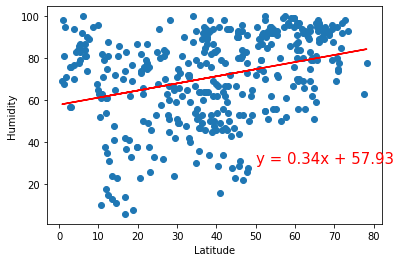

In [50]:
# Northern Hemisphere
# Marcela code
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], ("Humidity"), (50), (30))

The r-value is: 0.07392980474132572


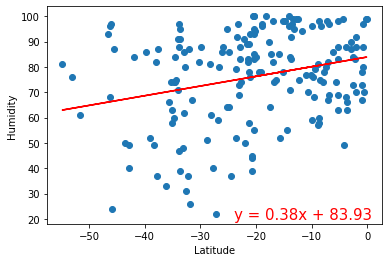

In [54]:
# Southern Hemisphere
# Marcela code
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], ("Humidity"), (-24), (20))

**Discussion about the linear relationship:** Humidity and latitude are weakly related in both the Southern and Northern hemispheres. Humidity varies within different latitude coordinates for both the Northern and Southern hemispheres and latitude is likely not predictive of humidity for these cities.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05544530221043192


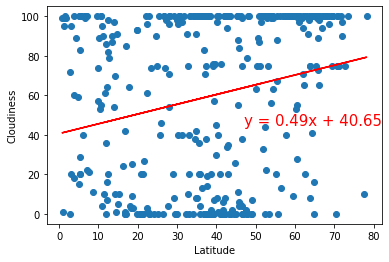

In [55]:
# Northern Hemisphere
# Marcela code
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], ("Cloudiness"), (47), (45))

The r-value is: 0.11056471952114982


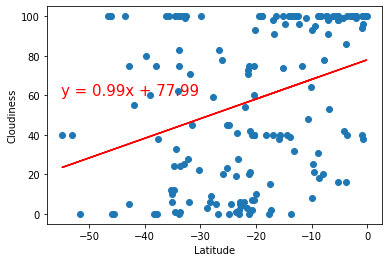

In [56]:
# Southern Hemisphere
# Marcela code
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], ("Cloudiness"), (-55), (60))

**Discussion about the linear relationship:** Latitude coordinates and cloudiness show a weak positive relationship. Based on the scatterplots, Northern and Southern latitude coordinates are likely not predictive of cloudiness in those areas. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04603035995970759


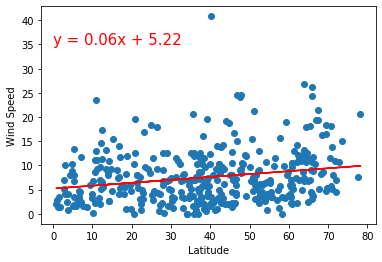

In [57]:
# Northern Hemisphere
# Marcela code
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], ("Wind Speed"), (0), (35))

The r-value is: 0.22679511202777303


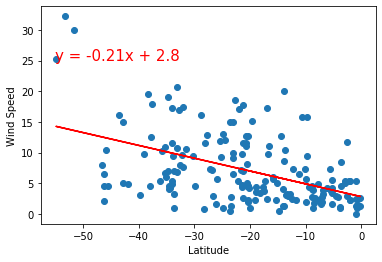

In [58]:
# Southern Hemisphere
# Marcela code
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], ("Wind Speed"), (-55), (25))

**Discussion about the linear relationship:**  In the Northern hemisphere, wind speed and latitude are very weakly related and the relationship is very slightly positive. In the Southern hemisphere, latitude and wind speed are also weakly related and the relationship is negative.